In [10]:
from population import *
from gen_landscape import *
import numpy as np
import datetime

# %%
mn_dist = 300
points_to_set_diamond = np.array([[mn_dist, 0], [0, mn_dist], [-mn_dist, 0], [0, -mn_dist], [0, 0]])
sqr_dist = np.sqrt(mn_dist**2/2)
points_to_set_sqr = np.array([[sqr_dist, sqr_dist], [-sqr_dist, sqr_dist], 
                              [-sqr_dist, -sqr_dist], [sqr_dist, -sqr_dist], [0, 0]])

points_diam_sqr = np.array([[mn_dist, 0], [sqr_dist, sqr_dist], [0, mn_dist], [-sqr_dist, sqr_dist],
                   [-mn_dist, 0], [-sqr_dist, -sqr_dist], [0, -mn_dist],[sqr_dist, -sqr_dist], [0, 0]])
# pure concave
convex = np.array([200, 200, 200, 200, 200, 200, 200, 200,0])
hill = np.array([200, 200, 200, 200, -200, -200, -200, -200,0])
flat = np.array([0, 0, 0, 0, 0, 0, 0, 0,0])
assigned_values = [0, 0, 0, 0, 0]
# saddle
assigned_half_saddle = [-100, 100, -100, -100, 0]
assigned_saddle = [-100, 100, -100, 100, 0]

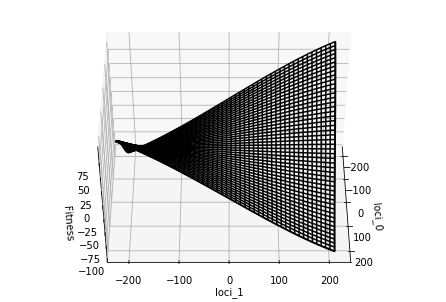

In [12]:
land = Landscape2D(points_chosen=points_to_set_sqr, points_fitness_values=assigned_saddle)
land.draw(elevation_deg=45, rotation_deg=0, mesh=True)

In [3]:
gia = Population(population_size=10000, loci=2, gene_mean=0, gene_sd=10,
                 proportion_asexual=0.5, survival_rate=0.5, mutation_std=2, landscape=land)

camera1 = Camera()

for i in range(1100):
    
    if gia.population_sizes(asex=True) < 100:
        result = 2
        break
    elif gia.population_sizes(sex=True) < 100:
        result = 1
        break
    elif i > 1000:
        result = 0
        break
    if i % 100 == 0:
        print('just completed iteration ',i)
    if i%10==0:
        camera1.take_shot(gia)
    gia.mutation_stage()
    gia.survival_stage()
    gia.replication_stage()

print(i)   

just completed iteration  0
just completed iteration  100
just completed iteration  200
just completed iteration  300
just completed iteration  400
just completed iteration  500
just completed iteration  600
just completed iteration  700
just completed iteration  800
just completed iteration  900
just completed iteration  1000
1001


In [6]:
camera1.publish()

In [5]:
print('result:', result)

result: 0
